In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset Importing:

In [3]:
Iris=pd.read_csv(r'E:\Inernship\iris.csv')
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
Iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
Iris.isnull().any().sum()

0

In [6]:
Iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
# Data Visualization:

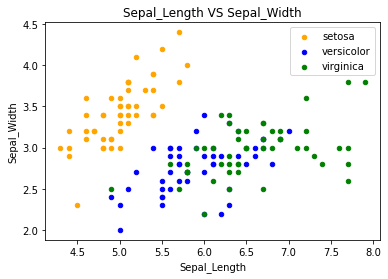

In [8]:
fig=Iris[Iris.species=='setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange',label='setosa')
Iris[Iris.species=='versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue',label='versicolor',ax=fig)
Iris[Iris.species=='virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green',label='virginica',ax=fig)
fig.set_xlabel('Sepal_Length')
fig.set_ylabel('Sepal_Width')
fig.set_title('Sepal_Length VS Sepal_Width')
fig=plt.gcf()
plt.show()

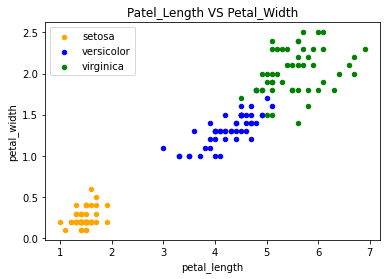

In [9]:
fig=Iris[Iris.species=='setosa'].plot(kind='scatter',x='petal_length',y='petal_width',color='orange',label='setosa')
Iris[Iris.species=='versicolor'].plot(kind='scatter',x='petal_length',y='petal_width',color='blue',label='versicolor',ax=fig)
Iris[Iris.species=='virginica'].plot(kind='scatter',x='petal_length',y='petal_width',color='green',label='virginica',ax=fig)
fig.set_xlabel('petal_length')
fig.set_ylabel('petal_width')
fig.set_title('Patel_Length VS Petal_Width')
fig=plt.gcf()
plt.show()

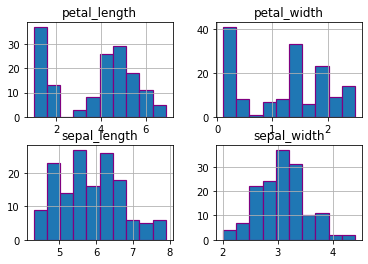

In [10]:
Iris.hist(edgecolor='purple',linewidth=1.2)
fig=plt.gcf()
plt.show()

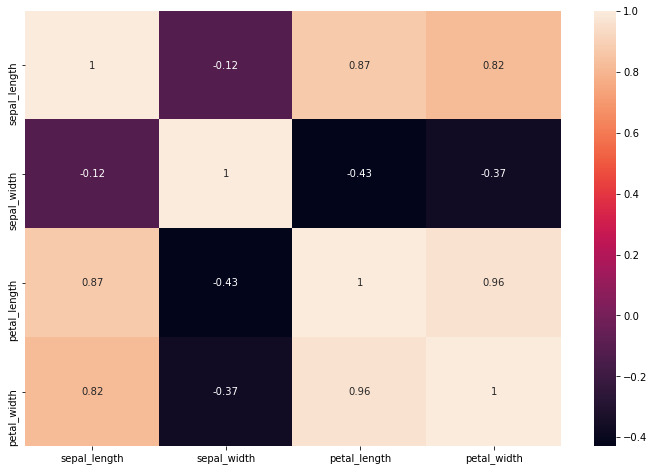

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(Iris.corr(),annot=True)
plt.show()

In [12]:
# Split dataset into train and test sets

In [13]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(Iris,test_size=0.3)

In [14]:
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [15]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]
train_y=train.species
test_X= test[['sepal_length','sepal_width','petal_length','petal_width']] 
test_y =test.species


In [16]:
# Defining Decision Tree Algorithm

In [18]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(train_X,train_y)
pred=DTC.predict(test_X)
Acc_DTC=round(DTC.score(train_X,train_y)*100)
Acc_DTC

100.0

In [19]:
# By using all columns ie. sepal_length, sepal_width, petal_length and petal_width score is 100%.
# hence model get over train with all columns.

In [20]:
petal=Iris[['petal_length','petal_width','species']]
sepal=Iris[['sepal_length','sepal_width','species']]

In [21]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)
train_p_x=train_p[['petal_length','petal_width']]
train_p_y=train_p.species
test_p_x=test_p[['petal_length','petal_width']]
test_p_y=test_p.species

In [22]:
DTC_1=DecisionTreeClassifier()
DTC_1.fit(train_p_x,train_p_y)
pred=DTC_1.predict(test_p_x)
Acc_DTC_1=round(DTC_1.score(train_p_x,train_p_y) * 100, 2)
Acc_DTC_1

99.05

In [23]:
# Here also I get 99.05% score with 2 columns ie. petal_length, petal_width

In [24]:
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_s_x=train_s[['sepal_length','sepal_width']]
train_s_y=train_s.species
test_s_x=test_s[['sepal_length','sepal_width']]
test_s_y=test_s.species

In [25]:
DTC_2=DecisionTreeClassifier()
DTC_2.fit(train_s_x,train_s_y)
pred=DTC_2.predict(test_s_x)
Acc_DTC_2=round(DTC_2.score(train_s_x,train_s_y)*100)
Acc_DTC_2

94.0

In [ ]:
# Constructing confusion matrix:

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_s_y, pred)

array([[16,  0,  0],
       [ 1, 11,  6],
       [ 0,  9,  2]], dtype=int64)

In [ ]:
# Conclusion:
# Here I get 99.05% score with 2 columns ie. petal_length and petal_width
# Model train perfectly.
# Also petal_length and petal_width have positive and close correlation and it is observed in heatmap.
# Also sepal_length and sepal_width have negative correlation.

In [ ]:
# Thank You :